IMPORTING LIBRARIES AND DATASETS

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
import seaborn as sn
tf.__version__

'2.13.1'

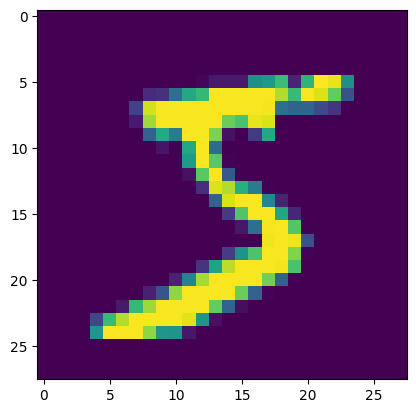

In [3]:
# Importing the MINST dataset from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[0])

In [4]:
print(y_train[:50])     # helps to find out the output layer for the model

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [5]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# CONVOLUTIONAL NEURAL NETWORK 

In [7]:
model_B = tf.keras.Sequential() 
model_B.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))    # adding convolution layer
model_B.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))                                           # adding pooling layer
model_B.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))                           # another layer of convolution and pooling
model_B.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model_B.add(tf.keras.layers.Flatten())
model_B.add(tf.keras.layers.Dense(units=512, activation='relu'))                                            # adding hidden layer
model_B.add(tf.keras.layers.Dense(units=10, activation='softmax'))                                          # output layer


In [8]:
model_B.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy', 'mse'])
model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [9]:
model_B_training = model_B.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1112 - accuracy: 0.9657 - mse: 27.3887 - val_loss: 0.0377 - val_accuracy: 0.9874 - val_mse: 27.3376
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0381 - accuracy: 0.9883 - mse: 27.3926 - val_loss: 0.0297 - val_accuracy: 0.9893 - val_mse: 27.3389
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0255 - accuracy: 0.9917 - mse: 27.3933 - val_loss: 0.0252 - val_accuracy: 0.9918 - val_mse: 27.3393
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0170 - accuracy: 0.9945 - mse: 27.3937 - val_loss: 0.0300 - val_accuracy: 0.9900 - val_mse: 27.3393
Epoch 5/10
1875/1875 [==============================] - 4730s 3s/step - loss: 0.0144 - accuracy: 0.9955 - mse: 27.3938 - val_loss: 0.0257 - val_accuracy: 0.9916 - val_mse: 27.3395
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0105 - accuracy: 0.9

In [10]:
loss_value, accuracy_value, mse_value = model_B.evaluate(x_test, y_test)
print(f"Loss function value = {loss_value}\nAccuracy of the model = {accuracy_value}\nMSE value for the model = {mse_value}")

313/313 [==============================] - 5s 14ms/step - loss: 0.0354 - accuracy: 0.9925 - mse: 27.3399
Loss function value = 0.035356272011995316
Accuracy of the model = 0.9925000071525574
MSE value for the model = 27.339874267578125


313/313 [==============================] - 4s 10ms/step


Text(0.5, 1.0, 'Confusion Matrix Table')

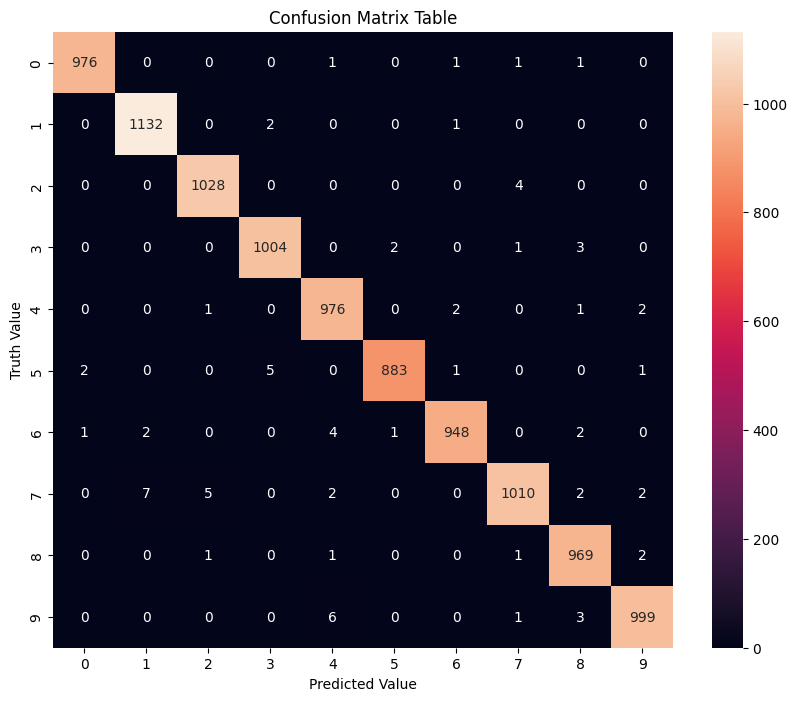

In [ ]:
# Predictions
A_prediction = model_B.predict(x_test)
# A_prediction[0]
fc_pred = [np.argmax(i) for i in A_prediction]
cm = tf.math.confusion_matrix(y_test, fc_pred)
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
plt.title("Confusion Matrix Table")

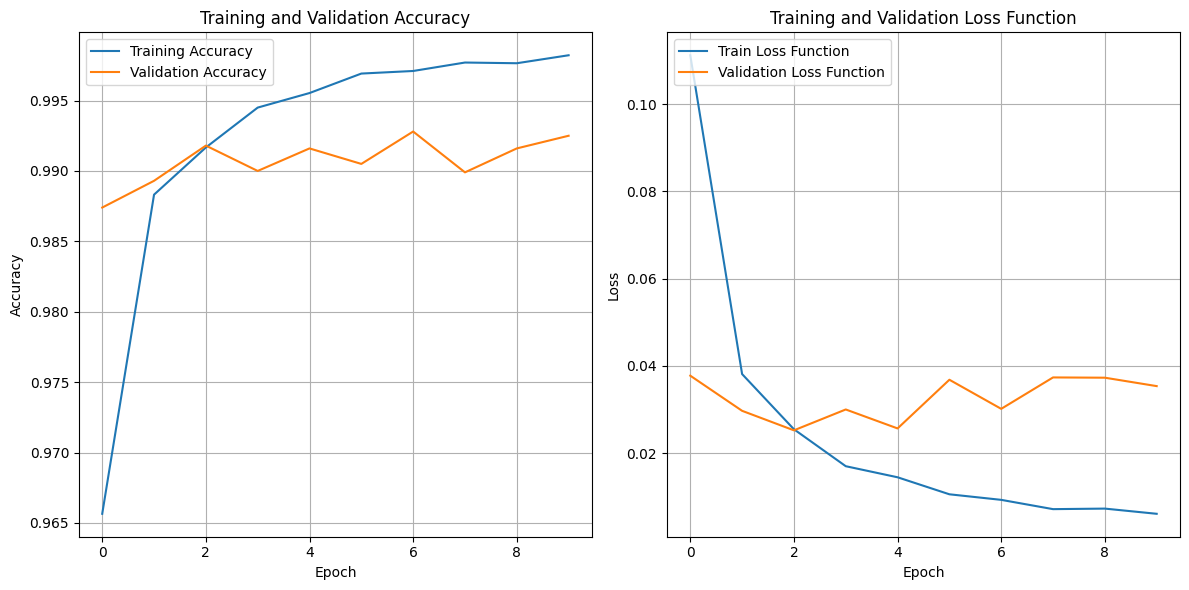

In [12]:
history = model_B_training

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['Train Loss Function', 'Validation Loss Function'], loc='upper left')

plt.tight_layout()
plt.show()